In [18]:
# load data
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [19]:
df.shape

(541909, 8)

In [21]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [22]:
#Country with high count must be taken for testing purpose... can we divide based on demographic or similar taste

df.Country.value_counts().head()

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [23]:
df = df[df.Country=='United Kingdom']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [24]:
df.Quantity.value_counts()

 1       146162
 2        78473
 12       50435
 3        35262
 6        35196
 4        34871
 24       19859
 10       19460
 5        11292
 8        10953
 48        4933
 25        4487
 20        4236
-1         3652
 16        3515
 36        3197
 7         2853
 9         1894
 18        1555
 72        1450
 100       1447
 96        1286
-2         1177
 30        1011
 40         954
 11         943
 32         895
 15         766
 50         756
 144        663
          ...  
-173          1
 425          1
-428          1
 852          1
-343          1
-939          1
-88           1
 342          1
-682          1
 1878         1
-85           1
 428          1
 688          1
 684          1
-1206         1
 176          1
-337          1
 175          1
 588          1
 1356         1
 77           1
-81           1
 430          1
-338          1
-434          1
-690          1
-83           1
-3667         1
 335          1
-380          1
Name: Quantity, Length: 

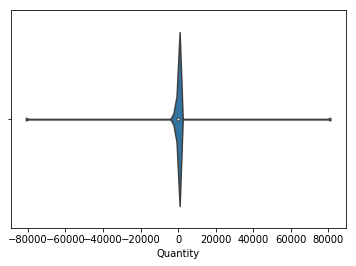

In [25]:
#checking distribution of quantity..

sns.violinplot(df.Quantity)


In [26]:
df.Quantity.describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [27]:
#Quantity can not be negative so remove negative values..

df = df[df.Quantity>0]
df.Quantity.describe()

count    486286.000000
mean          9.734640
std         163.262428
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [28]:
df.columns

Index([u'InvoiceNo', u'StockCode', u'Description', u'Quantity', u'InvoiceDate',
       u'UnitPrice', u'CustomerID', u'Country'],
      dtype='object')

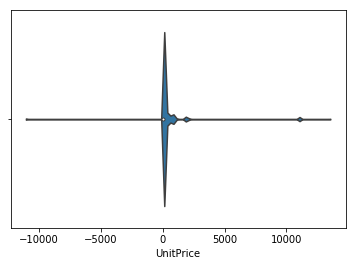

In [29]:
#checking distribution of unit price..

sns.violinplot(df.UnitPrice)

In [30]:
df.UnitPrice.describe()

count    486286.000000
mean          3.794976
std          41.271159
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [31]:
df = df[df.UnitPrice>0]
df.UnitPrice.describe()

count    485123.000000
mean          3.849679
std          34.677371
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [32]:
#checking null values in all columns in dataset

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485123 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      485123 non-null object
StockCode      485123 non-null object
Description    485123 non-null object
Quantity       485123 non-null int64
InvoiceDate    485123 non-null object
UnitPrice      485123 non-null float64
CustomerID     354321 non-null float64
Country        485123 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.3+ MB


In [34]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130802
Country             0
dtype: int64

In [35]:
null_values = pd.DataFrame(df.isnull().sum(), columns = ['count_value'])
null_values

,count_value
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,130802
Country,0


In [36]:
null_values.index

Index([u'InvoiceNo', u'StockCode', u'Description', u'Quantity', u'InvoiceDate',
       u'UnitPrice', u'CustomerID', u'Country'],
      dtype='object')

In [37]:
null_values.count_value

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130802
Country             0
Name: count_value, dtype: int64

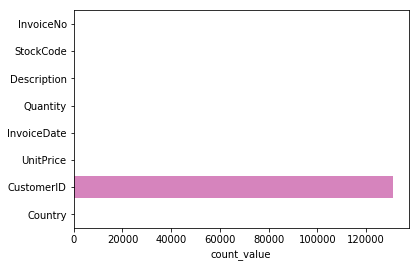

In [38]:
ax = sns.barplot(x = null_values.count_value, y= null_values.index )

In [41]:
# drop the null values

df.dropna(subset =['CustomerID'], how='all', inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354321 non-null object
StockCode      354321 non-null object
Description    354321 non-null object
Quantity       354321 non-null int64
InvoiceDate    354321 non-null object
UnitPrice      354321 non-null float64
CustomerID     354321 non-null float64
Country        354321 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [43]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [44]:

df.InvoiceDate.head()

0    12/1/2010 8:26
1    12/1/2010 8:26
2    12/1/2010 8:26
3    12/1/2010 8:26
4    12/1/2010 8:26
Name: InvoiceDate, dtype: object

In [45]:
#last date available in our dataset
df.InvoiceDate.max()

u'9/9/2011 9:52'

In [46]:

#use latest date in our data as current date..

import datetime as dt

now =dt.date(2011,12,9)

In [47]:
df['date']= pd.DatetimeIndex(df.InvoiceDate).date

In [48]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [71]:
#group by customer by last date they purchased...

recency_df = df.groupby(['CustomerID'], as_index=False)['date'].max()
recency_df.head()


,CustomerID,date
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [72]:
recency_df.columns = ['CustomerID', 'LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [73]:
recency_df.LastPurchaseDate.head()

0    2011-01-18
1    2011-12-07
2    2011-12-09
3    2011-12-06
4    2011-12-06
Name: LastPurchaseDate, dtype: object

In [74]:
#calculate how often he is purchasing with reference to latest date in days..

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now-x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [75]:

recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

In [76]:
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


### check frequency of customer means how many transaction has been done..



In [77]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [79]:
df.shape

(354321, 9)

In [87]:
df.InvoiceNo.value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

In [94]:
frequency_df = df.copy()
frequency_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [95]:
frequency_df.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True)

In [96]:
frequency_df.shape

(16646, 9)

In [97]:
df.shape

(354321, 9)

In [98]:
frequency_df=frequency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,209
3,12749.0,5
4,12820.0,4


In [99]:
frequency_df.shape

(3920, 2)

In [92]:
frequency_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 0 to 3919
Data columns (total 2 columns):
CustomerID    3920 non-null float64
Frequency     3920 non-null int64
dtypes: float64(1), int64(1)
memory usage: 91.9 KB


In [89]:
df.InvoiceNo.count()

354321

### calculate how much a customer spend in the each transaction..

In [100]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [147]:
df.shape

(354321, 10)

In [102]:
df['Total_cost'] = df['UnitPrice']*df['Quantity']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34


### check summed up spend of a customer with respect to latest date..

In [104]:
monetary_df = df.groupby('CustomerID', as_index=False)['Total_cost'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [105]:
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [106]:
frequency_df.head(2)

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11


In [112]:
#combine first recency and frequency..

rf = recency_df.merge(frequency_df, left_on='CustomerID',right_on='CustomerID')
rf.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,11
2,12748.0,0,209
3,12749.0,3,5
4,12820.0,3,4


In [113]:
#combibe rf frame with monetary values..

rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,11,4196.01
2,12748.0,0,209,33719.73
3,12749.0,3,5,4090.88
4,12820.0,3,4,942.34


In [114]:
rfm.set_index('CustomerID',inplace=True)

In [115]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,4196.01
12748.0,0,209,33719.73
12749.0,3,5,4090.88
12820.0,3,4,942.34


## checking correctness of output..

In [116]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,2011-01-18,77183.6


In [117]:

(now - dt.date(2011,1,18)).days == 325

True

In [118]:
#bring all the quartile value in a single dataframe

rfm_segmentation = rfm.copy()

In [120]:
from sklearn.cluster import KMeans

# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 

In [123]:
nc = range(1,20)
print(nc)

range(1, 20)


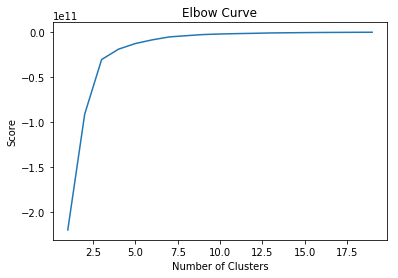

In [126]:
nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [133]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [134]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [135]:
kmeans.labels_

array([2, 0, 2, ..., 0, 0, 0])

In [136]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['cluster'] = kmeans.labels_

In [137]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,325,1,77183.60,2
12747.0,2,11,4196.01,0
12748.0,0,209,33719.73,2
12749.0,3,5,4090.88,0
12820.0,3,4,942.34,0


In [138]:
rfm_segmentation.cluster.unique()

array([2, 0, 1], dtype=int64)

In [139]:
#check our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 0].head(10)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12747.0,2,11,4196.01,0
12749.0,3,5,4090.88,0
12820.0,3,4,942.34,0
12821.0,214,1,92.72,0
12822.0,70,2,948.88,0
12823.0,74,5,1759.50,0
12824.0,59,1,397.12,0
12826.0,2,7,1474.72,0
12827.0,5,3,430.15,0


In [141]:
#check our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 1]

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
16446.0,0,2,168472.50,1
17450.0,8,46,194550.79,1
18102.0,0,60,259657.30,1


In [142]:
#check our hypothesis

rfm_segmentation[rfm_segmentation.cluster == 2].head(10)

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,325,1,77183.60,2
12748.0,0,209,33719.73,2
12931.0,21,15,42055.96,2
13081.0,11,11,28337.38,2
13089.0,2,97,58825.83,2
13098.0,1,28,28882.44,2
13408.0,1,62,28117.04,2
13694.0,3,50,65039.62,2
13777.0,0,33,25977.16,2


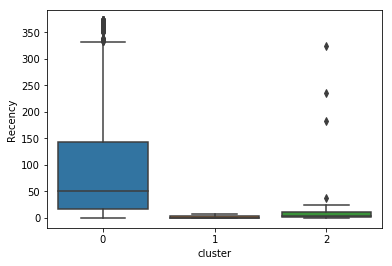

In [143]:
sns.boxplot(x = rfm_segmentation.cluster, y =rfm_segmentation.Recency)

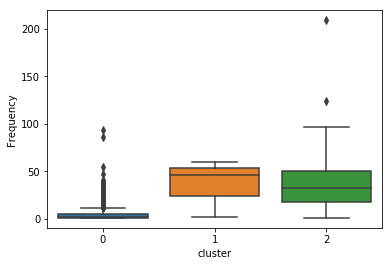

In [144]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Frequency)

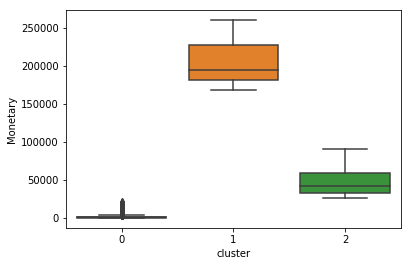

In [145]:
sns.boxplot(rfm_segmentation.cluster,rfm_segmentation.Monetary)

- cluster 1 is Platinum customers Cluster 2 is Gold Customers Cluster 3 is Silver Customers